In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
casualties_data = pd.read_csv('CasualtiesBig.csv')
vehicles_data=pd.read_csv('VehiclesBig.csv')
accidents_data=pd.read_csv('AccidentsBig.csv')


In [26]:
casualties_data.columns

print(casualties_data.describe())


       Accident_Index  Vehicle_Reference  Casualty_Reference  Casualty_Class  \
count    59998.000000       59998.000000        59998.000000    59998.000000   
mean     29999.500000           1.397297            1.351495        1.580736   
std      17320.075062           0.576247            0.858667        0.760265   
min          1.000000           1.000000            1.000000        1.000000   
25%      15000.250000           1.000000            1.000000        1.000000   
50%      29999.500000           1.000000            1.000000        1.000000   
75%      44998.750000           2.000000            1.000000        2.000000   
max      59998.000000          12.000000           23.000000        3.000000   

       Sex_of_Casualty  Age_of_Casualty  Age_Band_of_Casualty  \
count     59998.000000     59998.000000          59998.000000   
mean          1.401780        32.467949              5.741825   
std           0.490568        18.570679              2.547752   
min          -1.000

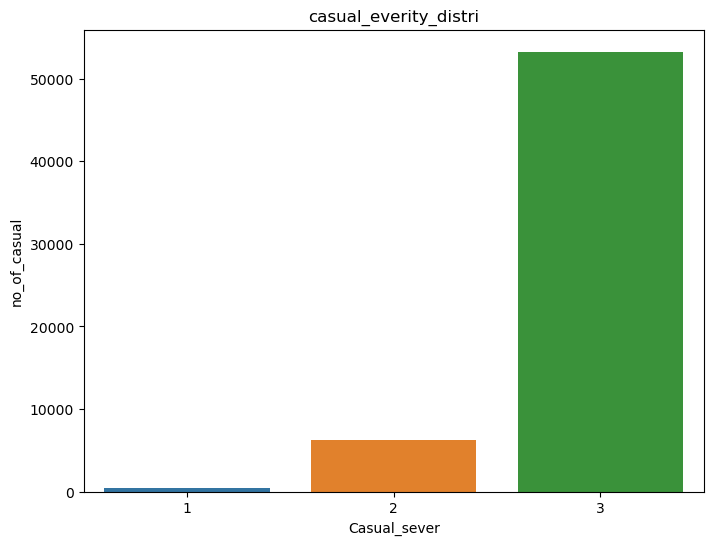

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=casualties_data, x='Casualty_Severity')
plt.xlabel('Casual_sever')
plt.ylabel('no_of_casual')
plt.title('casual_everity_distri')
plt.show()


       Accident_Index  Vehicle_Reference  Vehicle_Type  \
count    5.999900e+04       59999.000000  59999.000000   
mean     3.353056e+07           1.526775      9.151403   
std      8.205859e+09           0.679849      6.567517   
min      1.000000e+00           1.000000     -1.000000   
25%      1.500050e+04           1.000000      9.000000   
50%      3.000000e+04           1.000000      9.000000   
75%      4.499950e+04           2.000000      9.000000   
max      2.010000e+12          13.000000     90.000000   

       Towing_and_Articulation  Vehicle_Manoeuvre  \
count             59999.000000       59999.000000   
mean                  0.015867          12.745262   
std                   0.224462           6.103481   
min                  -1.000000          -1.000000   
25%                   0.000000           7.000000   
50%                   0.000000          17.000000   
75%                   0.000000          18.000000   
max                   5.000000          18.000000   


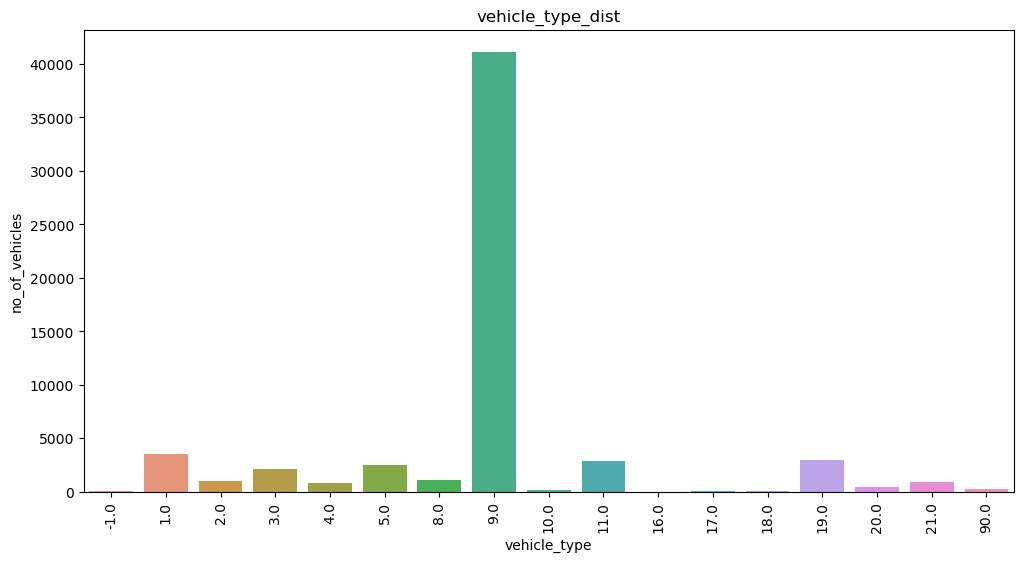

In [28]:
print(vehicles_data.describe())

plt.figure(figsize=(12, 6))
sns.countplot(data=vehicles_data, x='Vehicle_Type')
plt.xlabel('vehicle_type')
plt.ylabel('no_of_vehicles')
plt.title('vehicle_type_dist')
plt.xticks(rotation=90)
plt.show()


       Accident_Index     longitude      latitude  Police_Force  \
count    59998.000000  59998.000000  59998.000000  59998.000000   
mean     29999.500000     78.098483     22.083749      4.304360   
std      17320.075062      5.949539      5.655470      4.569113   
min          1.000000     69.015103      8.864429      1.000000   
25%      15000.250000     73.895816     18.555476      1.000000   
50%      29999.500000     77.050768     22.732800      4.000000   
75%      44998.750000     78.544677     27.091517      6.000000   
max      59998.000000     94.231931     31.068800     48.000000   

       Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
count       59998.000000        59998.000000          59998.000000   
mean            2.855512            1.832028              1.320761   
std             0.380983            0.692804              0.762099   
min             1.000000            1.000000              1.000000   
25%             3.000000            1.000000  

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

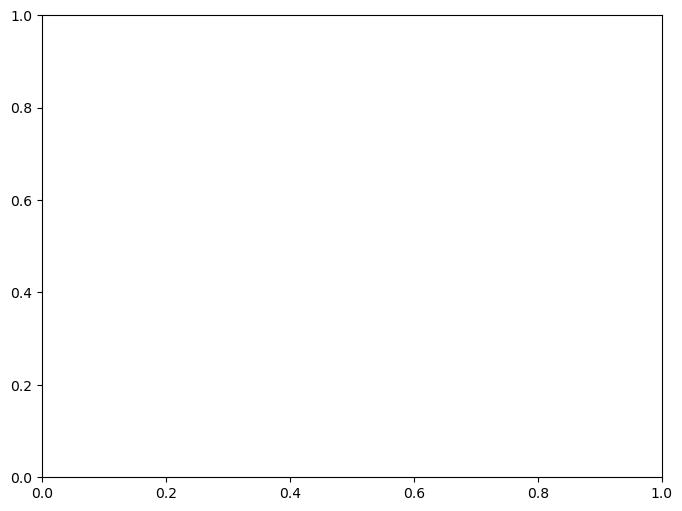

In [29]:
print(accidents_data.describe())

plt.figure(figsize=(8, 6))
sns.histplot(data=accidents_data, x='Accident_Severity', bins=3)#bin = space between the two plot
plt.xlabel('accidentseverity')
plt.ylabel('frequency')
plt.title('dist_accident_sever')
plt.show()

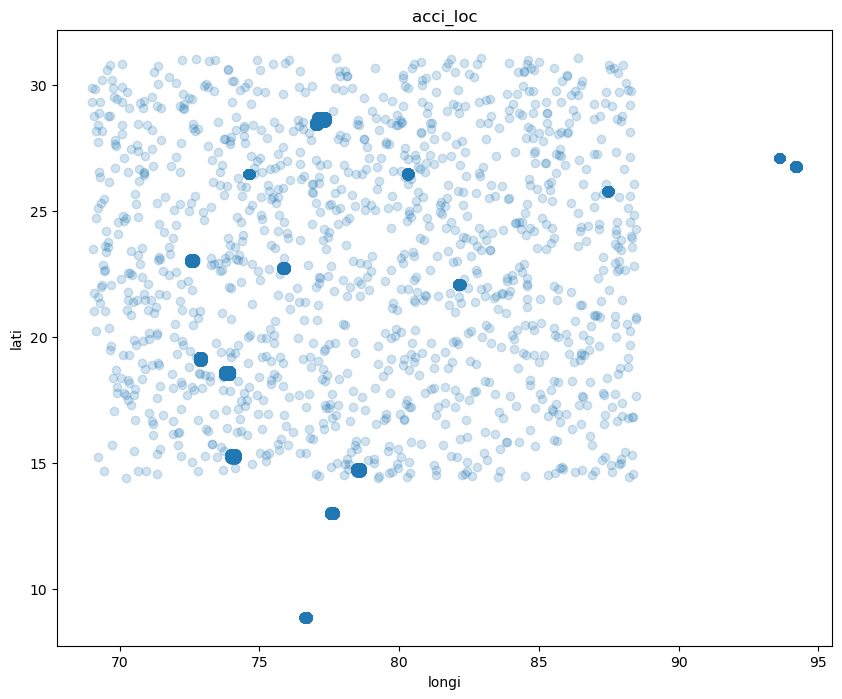

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(accidents_data['longitude'], accidents_data['latitude'],alpha=0.2)#alpha is used for highLight
plt.xlabel('longi')
plt.ylabel('lati')
plt.title('acci_loc')
plt.show()



OptionError: "No such keys(s): 'mode.use_inf_as_null'"

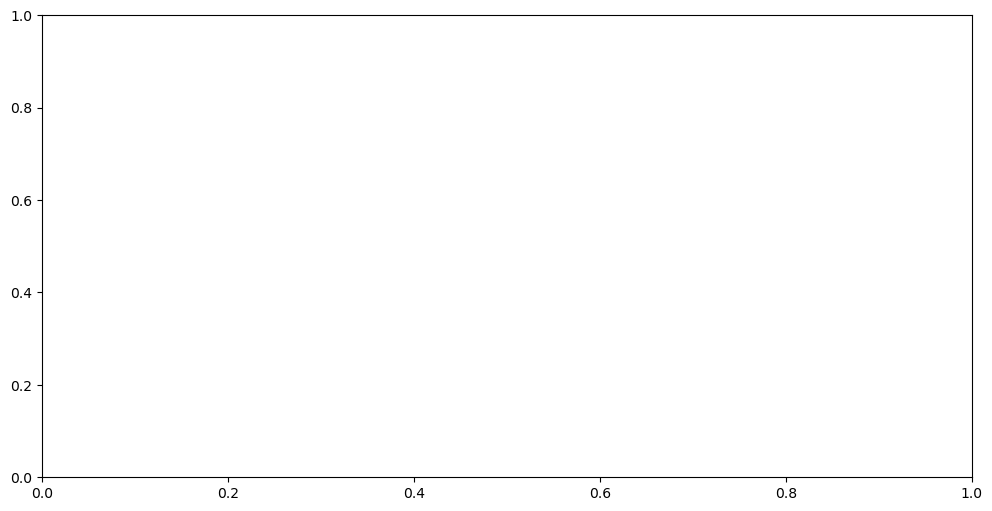

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(data=casualties_data, x='Age_of_Casualty', bins=20, kde=True)
plt.xlabel('age_cas')
plt.ylabel('freq')
plt.title('distr_age')
plt.show()


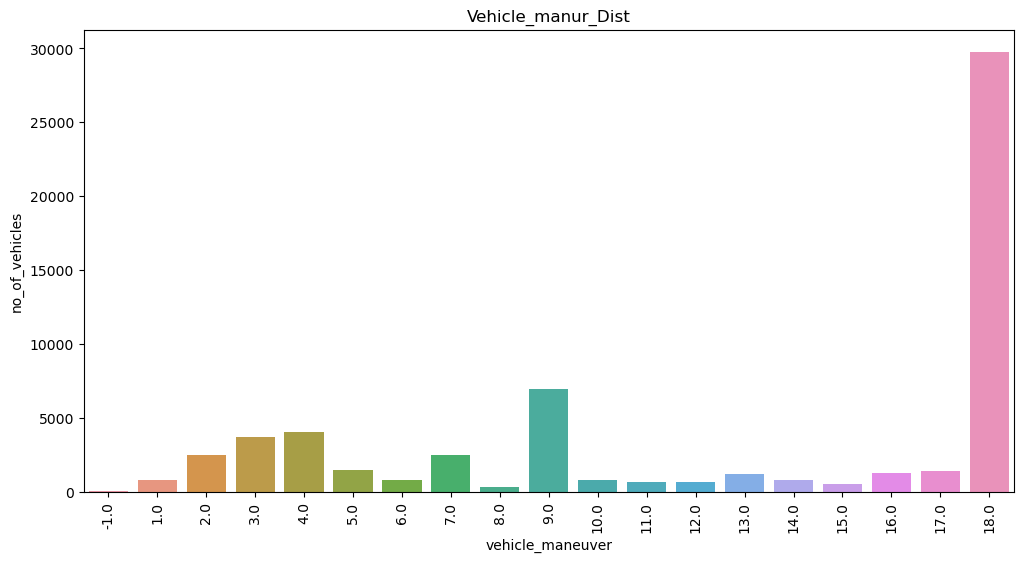

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(data=vehicles_data, x='Vehicle_Manoeuvre')
plt.xlabel('vehicle_maneuver')
plt.ylabel('no_of_vehicles')
plt.title('Vehicle_manur_Dist')
plt.xticks(rotation=90)
plt.show()

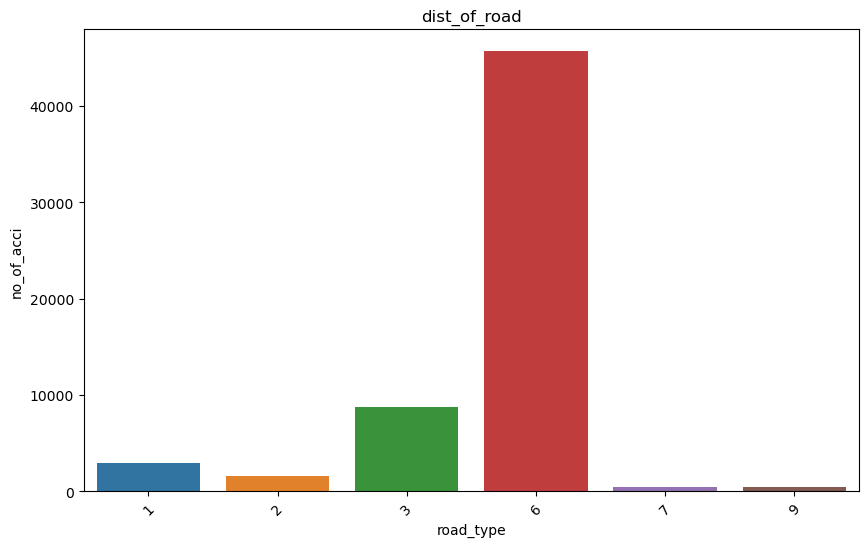

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=accidents_data, x='Road_Type')
plt.xlabel('road_type')
plt.ylabel('no_of_acci')
plt.title('dist_of_road')
plt.xticks(rotation=45)
plt.show()

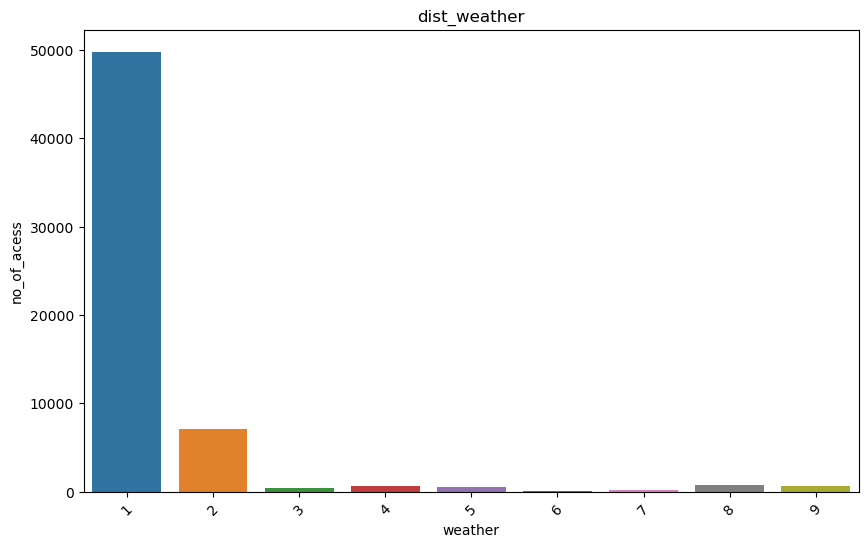

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=accidents_data, x='Weather_Conditions', palette='tab10')
plt.xlabel('weather')
plt.ylabel('no_of_acess')
plt.title('dist_weather')
plt.xticks(rotation=45)
plt.show()


In [ ]:
casualties_data['Age_of_Casualty'].fillna(casualties_data['Age_of_Casualty'].median(), inplace=True)

vehicles_data['Age_of_Driver'].fillna(vehicles_data['Age_of_Driver'].median(), inplace=True)

accidents_data.dropna(subset=['longitude', 'latitude'], inplace=True)

In [53]:
merged_data = accidents_data.merge(casualties_data, on='Accident_Index', how='inner')
merged_data = merged_data.merge(vehicles_data, on='Accident_Index', how='inner')

X = merged_data[['Age_of_Casualty', 'Sex_of_Casualty', 'Age_of_Driver', 'Vehicle_Type', 'Road_Surface_Conditions']]

y = merged_data['Casualty_Severity']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c_l = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [56]:
for name, clf in c_l.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    cla_rep = classification_report(y_test, y_pred)
    print(f'Model: {name}')
    print(f'Accuracy: {acc:.2f}')
    print('Classification Report:\n', cla_rep)
    print('-' * 50)

clf = RandomForestClassifier(random_state=42)


C:\Users\91939\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91939\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91939\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Model: Logistic Regression
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       108
           2       0.00      0.00      0.00      1241
           3       0.89      1.00      0.94     10651

    accuracy                           0.89     12000
   macro avg       0.30      0.33      0.31     12000
weighted avg       0.79      0.89      0.83     12000

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           1       0.01      0.01      0.01       108
           2       0.10      0.09      0.10      1241
           3       0.89      0.90      0.89     10651

    accuracy                           0.81     12000
   macro avg       0.33      0.33      0.33     12000
weighted avg       0.80      0.81      0.80     12000

--------------------------------------------------
Model: Ran

KeyboardInterrupt: 

In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [58]:
pa_g = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [59]:
grid_search = GridSearchCV(estimator=clf, param_grid=pa_g, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

b_pa = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('Best Hyperparameters:', b_pa)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


ValueError: Invalid parameter max_depth for estimator SVC(random_state=42). Check the list of available parameters with `estimator.get_params().keys()`.

In [60]:
from sklearn.model_selection import cross_val_score


In [62]:
best_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=1, random_state=42)


In [63]:
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
for fold, score in enumerate(cv_scores, start=1):
    print(f'Fold {fold}: Accuracy = {score:.2f}')
print(f'Average Accuracy: {cv_scores.mean():.2f}')


Fold 1: Accuracy = 0.89
Fold 2: Accuracy = 0.89
Fold 3: Accuracy = 0.88
Fold 4: Accuracy = 0.89
Fold 5: Accuracy = 0.89
Average Accuracy: 0.89


In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train_resampled, y_train_resampled)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)

Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           1       0.02      0.10      0.03       108
           2       0.11      0.20      0.14      1241
           3       0.89      0.76      0.82     10651

    accuracy                           0.70     12000
   macro avg       0.34      0.35      0.33     12000
weighted avg       0.80      0.70      0.74     12000



In [65]:
import joblib

model_filename = 'trained_model.joblib'

joblib.dump(clf, model_filename)
loaded_model = joblib.load(model_filename)
y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)


Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           1       0.02      0.10      0.03       108
           2       0.11      0.20      0.14      1241
           3       0.89      0.76      0.82     10651

    accuracy                           0.70     12000
   macro avg       0.34      0.35      0.33     12000
weighted avg       0.80      0.70      0.74     12000



In [66]:
import pandas as pd
import joblib

new_data = pd.DataFrame({
    'Age_of_Casualty': [25],
    'Sex_of_Casualty': ['Male'],
    'Age_of_Driver': [30],
    'Vehicle_Type': ['Car'],
    'Road_Surface_Conditions': ['Dry']
})
loaded_model = joblib.load('trained_model.joblib')
def preprocess_data(data):
    data['Sex_of_Casualty'] = data['Sex_of_Casualty'].map({'Male': 0, 'Female': 1})
    data['Vehicle_Type'] = data['Vehicle_Type'].map({'Car': 0, 'Truck': 1, 'Motorcycle': 2})
    data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].map({'Dry': 0, 'Wet': 1})
    return data
new_data_preprocessed = preprocess_data(new_data)
X_new = new_data_preprocessed[['Age_of_Casualty', 'Sex_of_Casualty', 'Age_of_Driver', 'Vehicle_Type', 'Road_Surface_Conditions']]
predicted_severity = loaded_model.predict(X_new)
print(f'Predicted Casualty Severity: {predicted_severity[0]}')
if predicted_severity==1:
    print("Fatal")
elif  predicted_severity==2:
    print("Serious")
else:
    print('Slight')

Predicted Casualty Severity: 2
Serious
